In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



"""
Advertising data contain 200 rows of data with 4 columns (3 feature and 1 sale value)

Feature includes:

TV ad-spend amount unit
Radio ad-spend amount unit
Newspaper ad-spend amount unit

And a sales column with sale amount unit

"""

df=pd.read_csv("Advertising.csv")
df.head()



,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#defining the X-features and ylabel
X=df.drop("sales",axis=1)
y=df["sales"]

In [4]:
#importing scikit-learn train-test split
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# print(len(X_train))
# print(len(X_test))
# print(len(X))
# X_train+X_test should be equal to X

134
66
200


In [8]:
#importing linear regression model algo from sklearn
from sklearn.linear_model import LinearRegression

In [9]:
#creating our own model
my_model=LinearRegression()

In [10]:
#fitting train data to our model
my_model.fit(X_train,y_train)

LinearRegression()

In [11]:
test_prediction=my_model.predict(X_test)

In [19]:
#performance evaluation
#MAE and RMSE

from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE=mean_absolute_error(y_test,test_prediction)
MSE=mean_squared_error(y_test,test_prediction)
RMSE=np.sqrt(MSE)


print("MAE~ ",MAE)
print("MSE*~ ",MSE)
print("RMSE~ ",RMSE)
#high RMSE compared to MAE suggest that there are some outliers with high deviation

#error is +/-
error_percentage = MAE*100/df["sales"].mean()

MAE~  1.4937750024728969
MSE*~  3.7279283306815096
RMSE~  1.9307843822347202


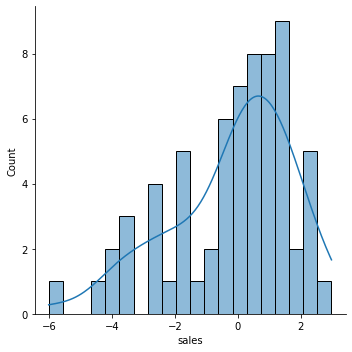

In [21]:
#linear regration - Residual plot to check if LR was a best fit for this dataset

test_residual = y_test-test_prediction

#Distribution

sns.displot(test_residual,kde=True,bins=20)
#the distribution should be normal and peak should be near 0 

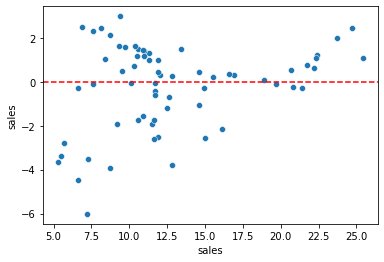

In [28]:
#raw residual plot
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0,color='r',ls="--")

#plot should be random with points evenly distributed equally above and below the horizontal line without any noticable pattern

In [29]:
#Final model with traing with all the data(train and test)
final_model=LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [30]:
#model coefficient
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

<!-- array([ 0.04576465,  0.18853002, -0.00103749])
here the values are beta coefficient for features in order (TV,Radio,Newspaper)
Understanding what the value indicated

beta 1 for feature 1 suggest that there is a positive coorelation bw money spend on tv ads and sales 
for every unit of money spend on Tv ad, the sale will increase by 0.04576 units keeping every other values as same-->

Text(0.5, 1.0, 'Newspaper spend')

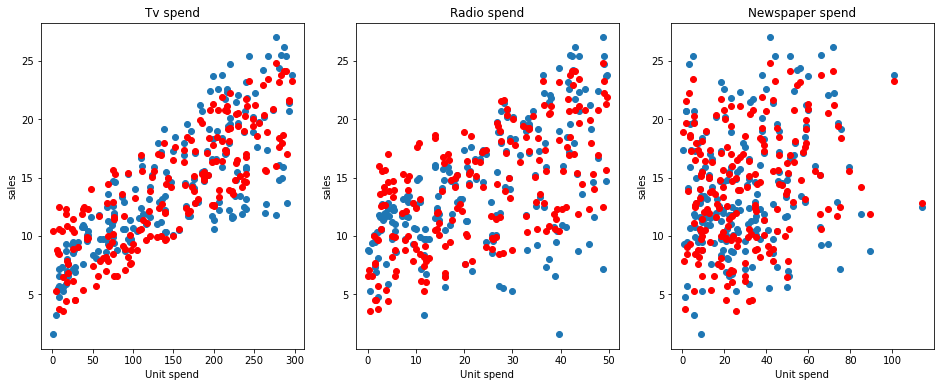

In [36]:
#plotting the predicted values for each feature seperatly wrt true label value

y_hat=final_model.predict(X)


fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df["TV"],df['sales'],'o')
axes[0].plot(df["TV"],y_hat,'o',color='r')
axes[0].set_ylabel("sales")
axes[0].set_xlabel("Unit spend")
axes[0].set_title("Tv spend")

axes[1].plot(df["radio"],df['sales'],'o')
axes[1].plot(df["radio"],y_hat,'o',color='r')
axes[1].set_ylabel("sales")
axes[1].set_xlabel("Unit spend")
axes[1].set_title("Radio spend")

axes[2].plot(df["newspaper"],df['sales'],'o')
axes[2].plot(df["newspaper"],y_hat,'o',color='r')
axes[2].set_ylabel("sales")
axes[2].set_xlabel("Unit spend")
axes[2].set_title("Newspaper spend")


#doubt?? How y_hat fix itself on the graphs ?

In [39]:
#save and load model

from joblib import dump,load

#saving model
dump(final_model,"LR_Ad-sale_data.joblib")


['LR_Ad-sale_data.joblib']

In [41]:
X.shape
#note while giving the input to model, we must match the shape of input data to data it was trained on 

(200, 3)

In [42]:
#load model
loaded_model=load("LR_Ad-sale_data.joblib")

In [48]:
#predicting new data based on loaded model
new_data=[[150,40,80]]

new_prediction=loaded_model.predict(new_data)

array([17.26178742])